In [2]:
import torch
import torch.nn as nn
import librosa

from lime_audio_explainer import lime_explain
import sys
sys.path.append('/home/woongjae/XAI')
from SSL_aasist.model import Model

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 로드
model_path = "/home/woongjae/XAI/SSL_aasist/Best_LA_model_for_DF.pth"
model = Model(None, device)
model = nn.DataParallel(model).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

print("✅ Model loaded:", model_path)

✅ Model loaded: /home/woongjae/XAI/SSL_aasist/Best_LA_model_for_DF.pth


In [4]:
audio_path = "/home/woongjae/XAI/LIME/myaudio_2.wav"

# librosa로 불러오기
waveform, sr = librosa.load(audio_path, sr=16000)
waveform = torch.tensor(waveform, dtype=torch.float32).unsqueeze(0).to(device)

print("✅ Audio loaded:", audio_path)
print("Waveform shape:", waveform.shape)

✅ Audio loaded: /home/woongjae/XAI/LIME/myaudio_2.wav
Waveform shape: torch.Size([1, 85522])


Total segments: 11
[Baseline] pred=0 (real), score=4.764380


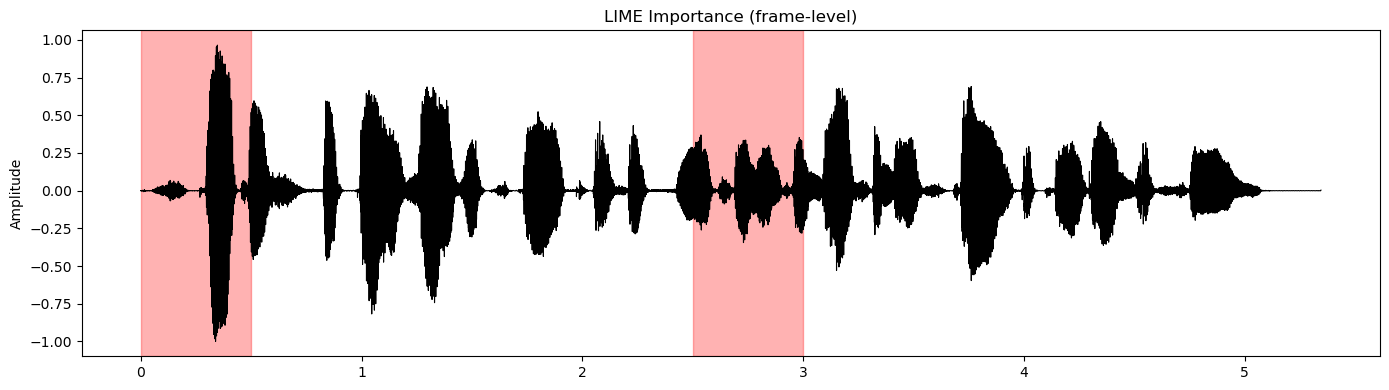

In [16]:
importances, segments, _ = lime_explain(
    model, waveform, audio_path=audio_path,
    mode="frame", frame_ms=500, num_samples=200,
    device=device, top_ratio=0.2
)

/home/woongjae/miniconda3/envs/aasist/lib/python3.8/site-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


Total segments: 14
[Baseline] pred=0 (real), score=4.764380


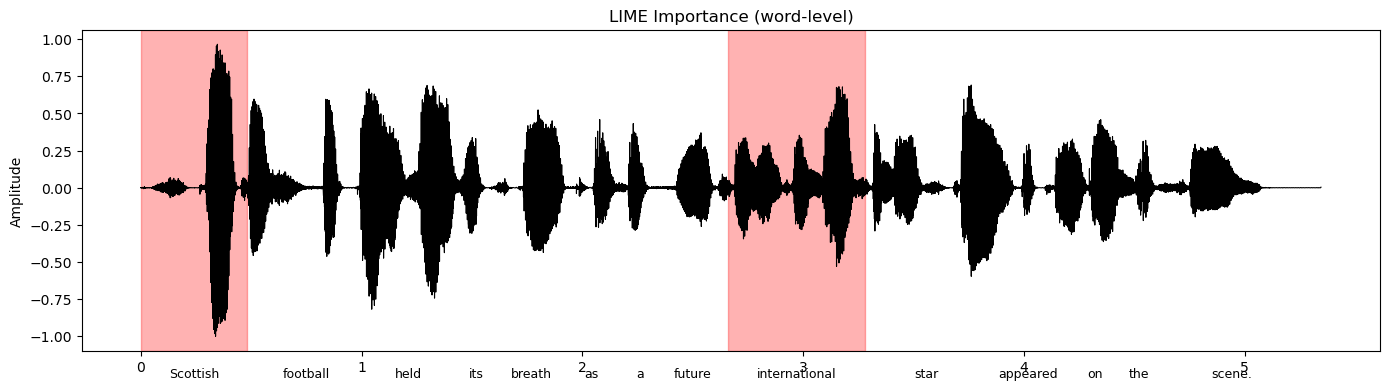

In [15]:
importances, segments, words = lime_explain(
    model, waveform, audio_path=audio_path,
    mode="word", num_samples=200,
    device=device, top_ratio=0.2
)